In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
# If we want to do time series manipulation, we’ll need to have a date time index so that our data frame is indexed on 
# the timestamp.
df = pd.read_csv('bhutan_fuel_prices.csv') # , parse_dates=['Approved_Date'], index_col='Approved_Date'
df.head()

Region      Product                               Company  \
0  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
1  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
2  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
3  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   
4  Western Region  HSD (in KL)  Bharat Petroleum Corporation Limited   

  Approved_Date        Station     RSP/KL   RSP/L  
0    2022-04-01  Phuentsholing   98497.76   98.50  
1    2022-04-01    Rinchending   98578.22   98.58  
2    2022-04-01        Pasakha   98631.86   98.63  
3    2022-04-01     Chimakothi  100206.55  100.21  
4    2022-04-01   Lungtenzampa  100650.06  100.65

In [57]:
# df[df['RSP/L']<30]

In [58]:
df.describe()

RSP/KL         RSP/L
count   11377.000000  11377.000000
mean    63861.075735     63.830219
std     13877.545175     13.916225
min         0.000000      0.000000
25%     54723.670000     54.680000
50%     63047.280000     63.050000
75%     72826.080000     72.830000
max    103511.930000    103.510000

In [59]:
df.dtypes

Region            object
Product           object
Company           object
Approved_Date     object
Station           object
RSP/KL           float64
RSP/L            float64
dtype: object

In [60]:
df.shape

(11378, 7)

In [61]:
df.isna().sum()

Region            0
Product           1
Company          16
Approved_Date     1
Station          30
RSP/KL            1
RSP/L             1
dtype: int64

In [62]:
# Total number of fuel stations in Bhutan

len(df.Station.unique())

69

In [63]:
df.Product.value_counts()


HSD (in KL)    5745
MS (in KL)     5614
SKO (in KL)      18
Name: Product, dtype: int64

In [64]:
index_names = df[ df['Product'] == 'SKO (in KL)' ].index
  
# drop these row indices from dataFrame
df.drop(index_names, inplace = True)

In [65]:
df.Product.value_counts()


HSD (in KL)    5745
MS (in KL)     5614
Name: Product, dtype: int64

In [66]:
# Note
# MS = Petrol
# HSD = High Speed Diesel (HSD) Diesel Oil 
# We will replace MS with Petrol and HSD with Diesel

In [67]:
df['Product'] = df['Product'].replace('HSD (in KL)', 'Diesel')
df['Product'] = df['Product'].replace('MS (in KL)', 'Petrol')
df.head()

Region Product                               Company Approved_Date  \
0  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
1  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
2  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
3  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
4  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   

         Station     RSP/KL   RSP/L  
0  Phuentsholing   98497.76   98.50  
1    Rinchending   98578.22   98.58  
2        Pasakha   98631.86   98.63  
3     Chimakothi  100206.55  100.21  
4   Lungtenzampa  100650.06  100.65

In [68]:
df.Region.value_counts()


Western Region    4715
Eastern Region    3642
Central Region    3002
                    1
Name: Region, dtype: int64

In [69]:
# In the above, we see that there is one unique Region, we will try to check the uniques values
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region', '\x1a'],
      dtype=object)

In [70]:
index_names = df[ df['Region'] == '\x1a' ].index
  
# drop these row indices from dataFrame
df.drop(index_names, inplace = True)

In [71]:
df.Region.unique()

array(['Western Region', 'Central Region', 'Eastern Region'], dtype=object)

In [72]:
df.Company.value_counts()

Indian Oil Corporation Limited             5960
Bharat Petroleum Corporation Limited       5155
Hindustan Petroleum Corporation Limited     229
Name: Company, dtype: int64

In [73]:
df.Station.unique()

array(['Phuentsholing', 'Rinchending', 'Pasakha', 'Chimakothi',
       'Lungtenzampa', 'Paro Town', 'Haa', 'Bajo Town', 'Beychu',
       'Samtse Town', 'Sipsoo', 'Gomtu', 'Gedu', 'Khuruthang', 'Gasa',
       'Motithang', 'Olakha', 'Paro NIE Bridge', 'Langlitsawa',
       'Wangdue Zero Point', 'Phuentsholing Main gate',
       'Gelephu Forest Checkpost', 'Sarpang', 'Dagapela', 'Tsirang',
       'Zhemgang', 'Trongsa', 'Bumthang', 'Dagana', 'Lhamoizingkha',
       'Dangdung', 'Panbang', 'Tingtibi', 'Gelephu Gate', 'Gelephu Town',
       'Samdrup Jongkhar', 'Wamrong', 'Trashigang', 'Trashiyangtse',
       'Mongar', 'Gyelposing', 'Kanglung', 'Pemagatshel', 'Lhuntse',
       'Jomotsangkha', 'Autsho', 'Doksum', 'Bhangtar', 'Rangjung',
       'Nganglam', 'Samdrup Jongkhar Gate', 'Nganglam Potonala',
       'Samdrup Jongkhar Upper Town', 'Lobesa', 'Chubachu', 'Paro Shaba',
       'Samtse Checkpost', 'Pagli', 'Mitsina', 'Dorokha',
       'Langdru (Khasadrapchu)', 'Chanzamtok', 'Gomtu Phuentshope

In [74]:
# Drop the "RSP/KL" column
df.drop(["RSP/KL"], axis = 1, inplace = True)


In [75]:
df.head()

Region Product                               Company Approved_Date  \
0  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
1  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
2  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
3  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   
4  Western Region  Diesel  Bharat Petroleum Corporation Limited    2022-04-01   

         Station   RSP/L  
0  Phuentsholing   98.50  
1    Rinchending   98.58  
2        Pasakha   98.63  
3     Chimakothi  100.21  
4   Lungtenzampa  100.65

## EDA and Visualization

Visualize in which Region the fuel prices are most changed

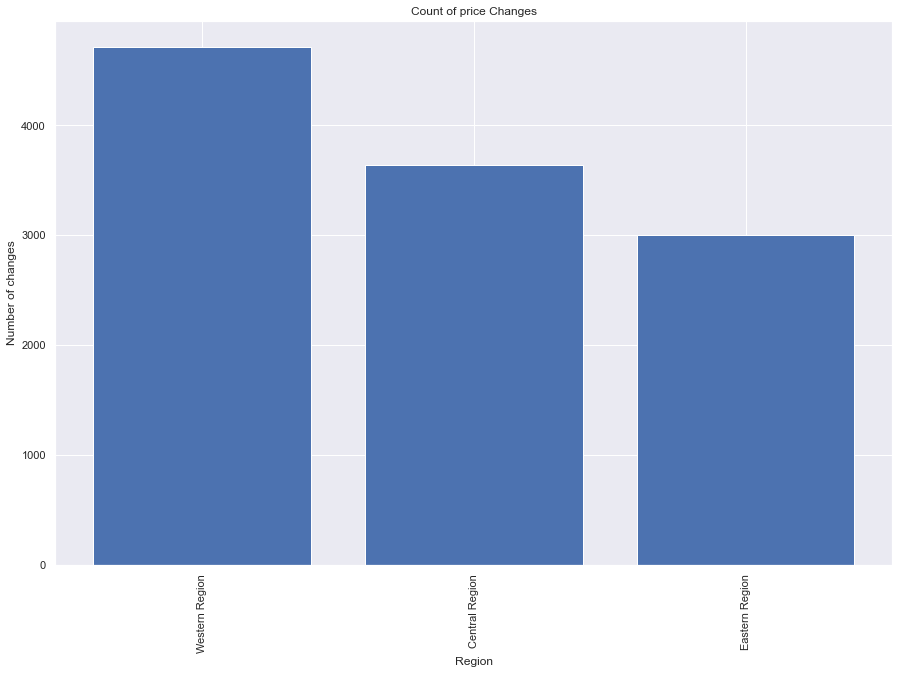

In [76]:

x = df.Region.unique()
y = df.Region.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of price Changes')
plt.xlabel('Region')
plt.ylabel('Number of changes')
plt.xticks(rotation=90)
plt.show()

### EDA and Visualization

Visualize in which Region the fuel prices are most changed

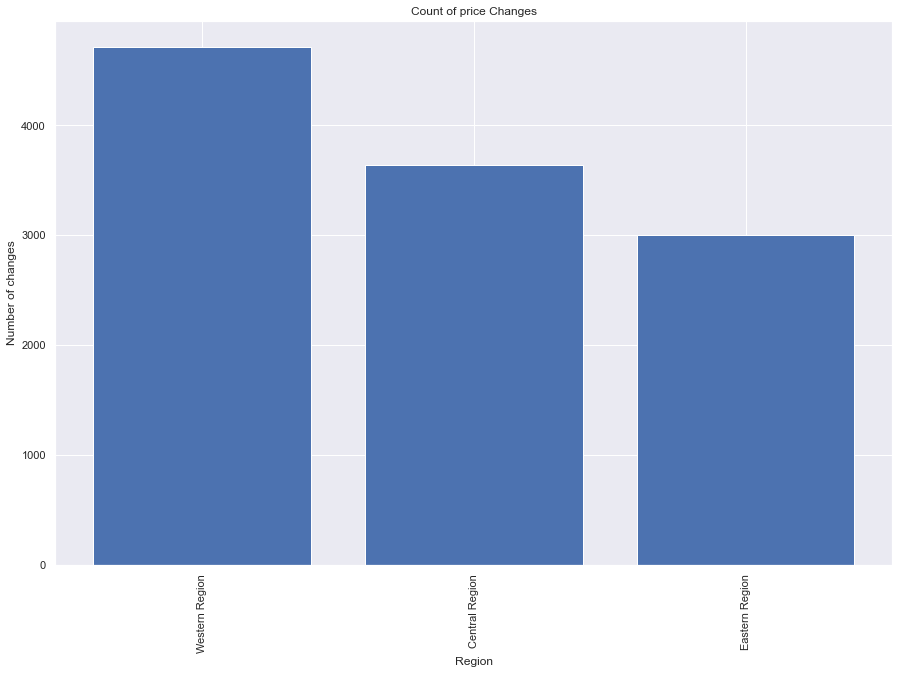

In [77]:


x = df.Region.unique()
y = df.Region.value_counts()[:20]

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Count of price Changes')
plt.xlabel('Region')
plt.ylabel('Number of changes')
plt.xticks(rotation=90)
plt.show()

### Visualize different products and the number of changes

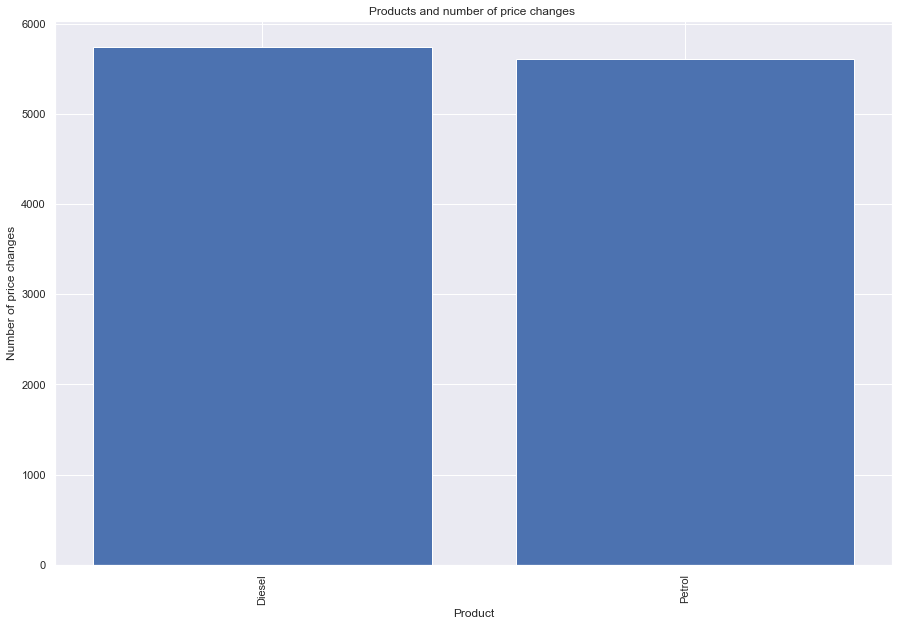

In [78]:


x = df.Product.unique()
y = df.Product.value_counts()

sns.set(rc={'figure.figsize':(15,10)})
plt.bar(x,y)
plt.title('Products and number of price changes ')
plt.xlabel('Product')
plt.ylabel('Number of price changes')
plt.xticks(rotation=90)
plt.show()

### Most Fuel Price Ranges

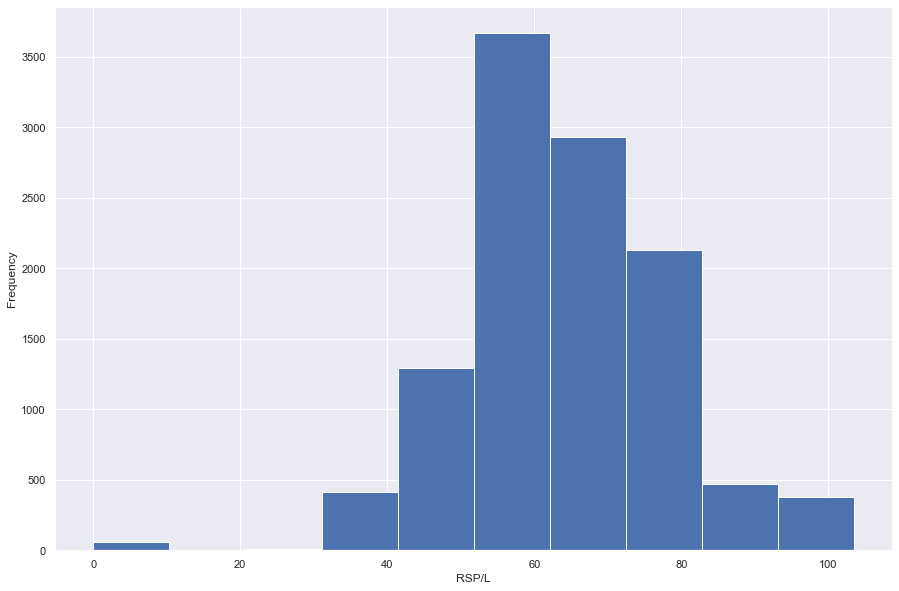

In [79]:
x = df['RSP/L']

sns.set(rc={'figure.figsize':(15,10)})
plt.hist(x)
plt.xlabel("RSP/L")
plt.ylabel("Frequency")
plt.show()

### Ploting boxplot to check outliers in price

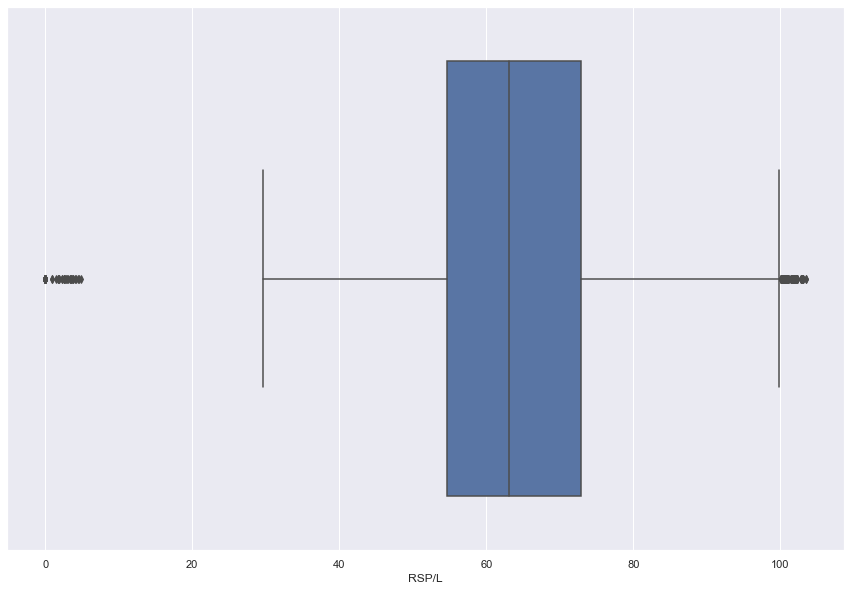

In [80]:

sns.boxplot(x=df['RSP/L'])
plt.show()

In [81]:
# calculating IQR and upper limit and lower limit to find outliers
Q1 = df['RSP/L'].quantile(0.25)
Q3 = df['RSP/L'].quantile(0.75)
IQR = Q3 - Q1
upperlimit = Q3 + (IQR * 1.5)
lowerlimit = Q1 - (IQR * 1.5)
print('upper limit: {}'.format(upperlimit))
print('lower limit: {}'.format(lowerlimit))

upper limit: 99.995
lower limit: 27.555


In [82]:
## checking outliers
df[(df['RSP/L'] < lowerlimit)  | (df['RSP/L'] > upperlimit)]

Region Product                               Company  \
3      Western Region  Diesel  Bharat Petroleum Corporation Limited   
4      Western Region  Diesel  Bharat Petroleum Corporation Limited   
5      Western Region  Diesel  Bharat Petroleum Corporation Limited   
6      Western Region  Diesel  Bharat Petroleum Corporation Limited   
7      Western Region  Diesel  Bharat Petroleum Corporation Limited   
...               ...     ...                                   ...   
10042  Eastern Region  Petrol        Indian Oil Corporation Limited   
10043  Eastern Region  Petrol        Indian Oil Corporation Limited   
10044  Eastern Region  Petrol        Indian Oil Corporation Limited   
10045  Eastern Region  Petrol        Indian Oil Corporation Limited   
10046  Eastern Region  Petrol        Indian Oil Corporation Limited   

      Approved_Date       Station   RSP/L  
3        2022-04-01    Chimakothi  100.21  
4        2022-04-01  Lungtenzampa  100.65  
5        2022-04-01     Paro Town  100.67  
6        2022-04-01           Haa  101.50  
7        2022-04-01     Bajo Town  100.77  
...             ...           ...     ...  
10042    2020-08-05  Jomotsangkha    1.71  
10043    2020-08-05        Autsho    4.53  
10044    2020-08-05        Doksum    3.54  
10045    2020-08-05      Bhangtar    2.32  
10046    2020-08-05      Rangjung    3.47  

[205 rows x 6 columns]

In [83]:
## Drop all the rows containing height beyond lower and upper limit.
df = df[(df['RSP/L'] > lowerlimit) & (df['RSP/L'] < upperlimit)]
df.shape

(11154, 6)

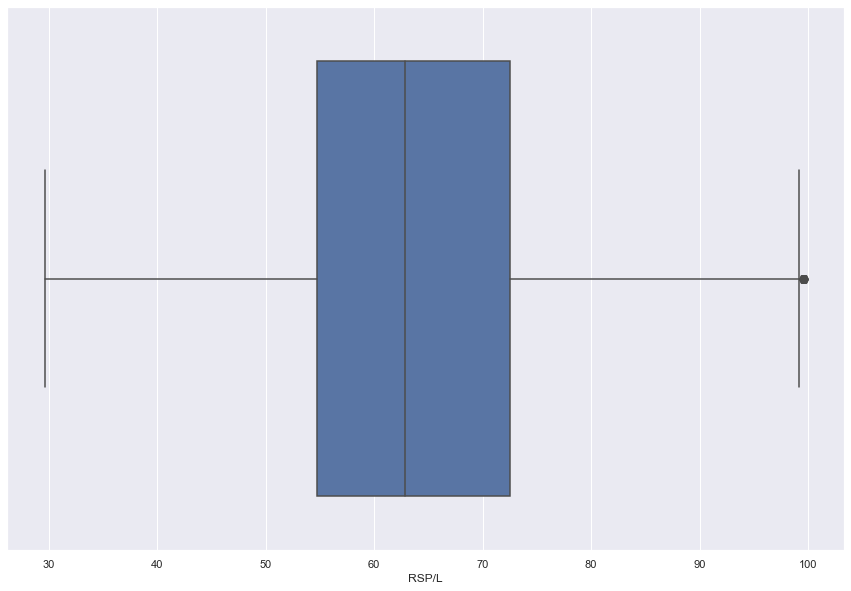

In [84]:
## ploting boxplot to check outliers are removed or not
sns.boxplot(x=df['RSP/L'])
plt.show()

In [85]:
df.to_csv('price.csv')

In [86]:
df.dtypes

Region            object
Product           object
Company           object
Approved_Date     object
Station           object
RSP/L            float64
dtype: object

In [87]:
X = df.drop('RSP/L', axis=1)
y = df['RSP/L']

In [88]:
y.isnull().sum()

0

In [89]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.20)

In [90]:
X_train.shape

(8923, 5)

In [91]:
y_train.shape

(8923,)

In [92]:
# Creating Pipeline for the model

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

In [93]:
# y_cols = y.columns
# print(y_cols)

In [94]:
# Separate the Categorical and Numerical Columns
# Numeric columns
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
print(numeric_cols)

# categorical columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(categorical_cols)

Index([], dtype='object')
Index(['Region', 'Product', 'Company', 'Approved_Date', 'Station'], dtype='object')


In [95]:
# y_index = [y.columns.get_loc(col) for col in y_cols]
# y_index

In [96]:
categorical_index = [X.columns.get_loc(col) for col in categorical_cols]
categorical_index

[0, 1, 2, 3, 4]

In [97]:
# # Building y pipeline
# y_transformer = Pipeline(steps=[
#     ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value=np.nan)),
# ])

In [98]:
# Building the Categorical Transformation Pipeline
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy = 'most_frequent',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))  # Try with LabelEncoder
])

In [99]:
# Combine the numeric and categorical transformers
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    
    transformers = [

        ('categorical', categorical_transformer, categorical_index)
    ]
    
)

In [100]:
# Create the estimator for training
# from sklearn.linear_model import LinearRegression

# lr = LinearRegression()



# from sklearn.tree import DecisionTreeRegressor

# dst = DecisionTreeRegressor()

# from sklearn.neighbors import KNeighborsRegressor

# knnr = KNeighborsRegressor(n_neighbors = 6)


# from sklearn.ensemble import RandomForestRegressor
# rfmodel = RandomForestRegressor()
  
    
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 300, max_depth = 3, random_state = 1)


In [101]:
# Assemble the individual blocks to form the main pipeline
main_model = Pipeline(
    steps = [
      ('preprocessor', preprocessor), #Preprocessing
      ('model'  , gbr)  #Model
    ]
)

In [102]:
#Training the model using pipeline
# Display Pipeline
from sklearn import set_config
set_config(display='diagram')
#fit data
main_model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4])])),
                ('model',
                 GradientBoostingRegressor(n_estimators=300, random_state=1))])

In [103]:
#Import all the metrics for validation and evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

In [104]:
y_pred = main_model.predict(X_test)
print(y_pred)

[56.22576892 73.5831332  41.44217286 ... 63.90599195 81.56407569
 69.03855331]


In [105]:
y_test

8534     52.88
1040     78.25
11191    39.16
2422     71.44
4875     85.69
         ...  
5927     51.87
6008     53.40
4303     66.14
1522     84.28
3352     71.33
Name: RSP/L, Length: 2231, dtype: float64

In [106]:
main_model.score(X_train, y_train)

0.9689017393241791

In [107]:
main_model.score(X_test, y_test)

0.9675759670906633

In [109]:
main_model.predict(X_test.head(1))

array([56.22576892])

In [110]:
X_train.head(1)

Region Product                               Company  \
7949  Eastern Region  Petrol  Bharat Petroleum Corporation Limited   

     Approved_Date Station  
7949    2021-02-01  Mongar

In [111]:
y_test.head()

8534     52.88
1040     78.25
11191    39.16
2422     71.44
4875     85.69
Name: RSP/L, dtype: float64

In [112]:
X_train.columns

Index(['Region', 'Product', 'Company', 'Approved_Date', 'Station'], dtype='object')

In [113]:
np.array(X_train.head(1))

array([['Eastern Region', 'Petrol',
        'Bharat Petroleum Corporation Limited', '2021-02-01', 'Mongar']],
      dtype=object)

### Score graph for different value of estimators for GradientBoostingRegressor

In [114]:
trainscore = []
testscore = []
for n in range(100,300):
    from sklearn.ensemble import GradientBoostingRegressor

    gbr = GradientBoostingRegressor(n_estimators = n, max_depth = 3, random_state = 1)
    
    main_model = Pipeline(
        steps = [
          ('preprocessor', preprocessor), #Preprocessing
          ('model'  , gbr)  #Model
        ]
    )

    main_model.fit(X_train,y_train)
    trainscore.append(main_model.score(X_train,y_train))
    testscore.append(main_model.score(X_test,y_test)) 

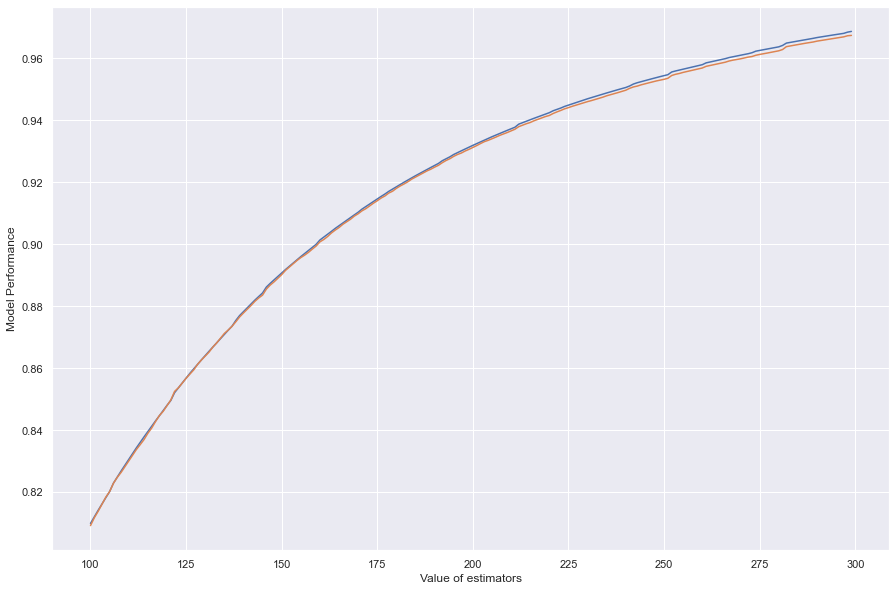

In [115]:
sns.lineplot(x = np.arange(100,300),y = trainscore)
sns.lineplot(x = np.arange(100,300),y = testscore)
plt.xlabel("Value of estimators")
plt.ylabel("Model Performance")
plt.show()

In [116]:

trainMSE = []
testMSE = []


from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

for n in range(100,300):
    from sklearn.ensemble import GradientBoostingRegressor

    gbr = GradientBoostingRegressor(n_estimators = n, max_depth = 3, random_state = 1)
    
    main_model = Pipeline(
        steps = [
          ('preprocessor', preprocessor), #Preprocessing
          ('model'  , gbr)  #Model
        ]
    )
    main_model.fit(X_train,y_train)
    ypred_tr = main_model.predict(X_train)
    ypred_te = main_model.predict(X_test)

    trainMSE.append(mean_squared_error(y_train,ypred_tr))
    testMSE.append(mean_squared_error(y_test,ypred_te))


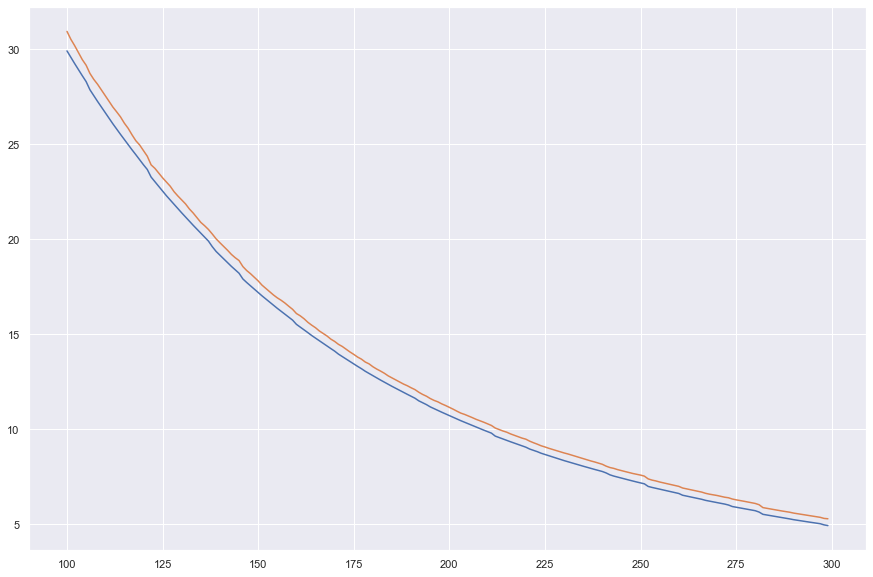

In [117]:
plt.plot(np.arange(100,300),trainMSE)
plt.plot(np.arange(100,300),testMSE)
plt.show()

In [118]:
# Save Model using pickle
import pickle
pickle.dump(main_model, open("model.pkl","wb"))

In [119]:
#load pickle model
model = pickle.load(open("model.pkl","rb"))
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4])])),
                ('model',
                 GradientBoostingRegressor(n_estimators=299, random_state=1))])

In [122]:
import sklearn
sklearn.__version__

'1.0.1'